# 의사결정나무

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [2]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [3]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

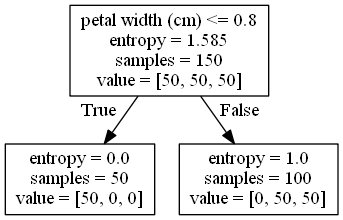

In [4]:
draw_decision_tree(tree1)

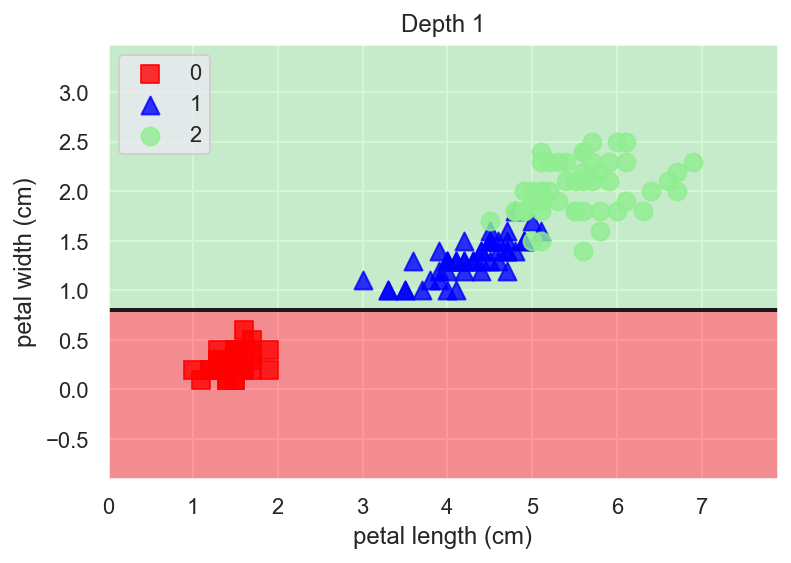

In [5]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [7]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
tree2.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

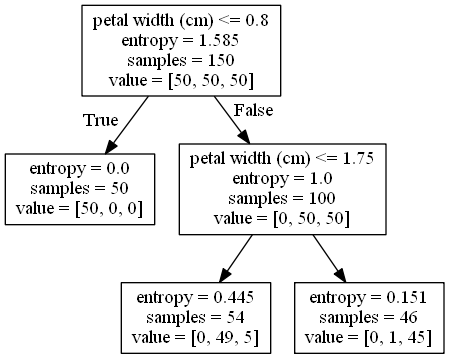

In [8]:
draw_decision_tree(tree2)

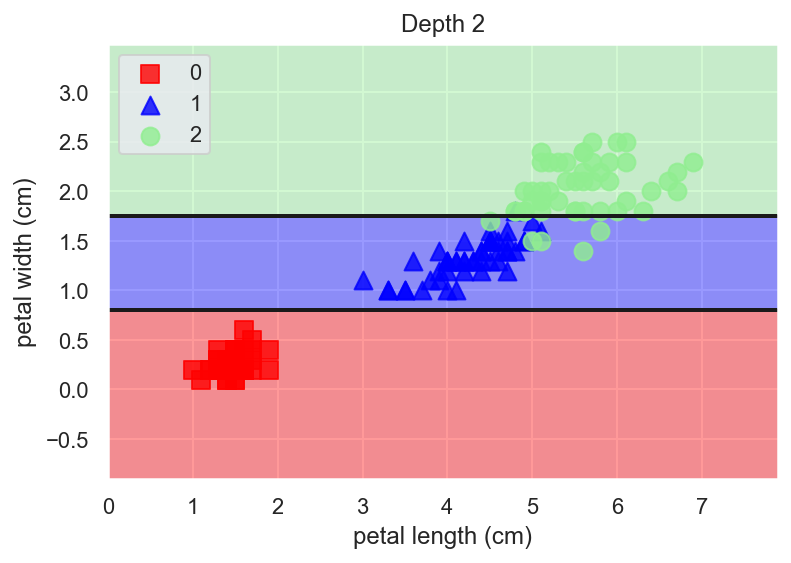

In [9]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [10]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

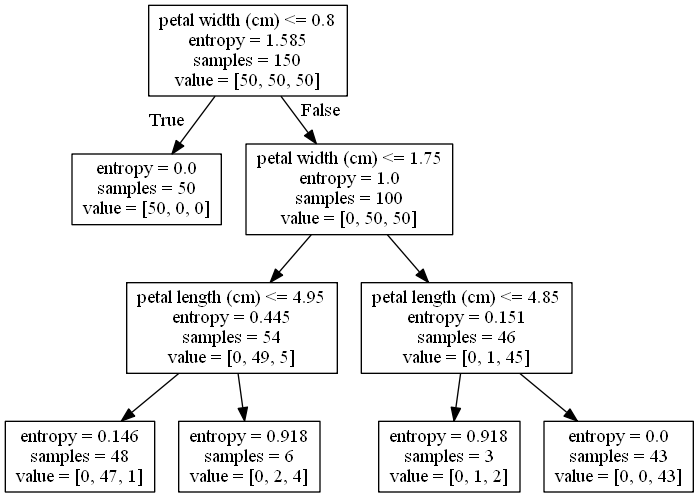

In [11]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X,y)
draw_decision_tree(tree3)

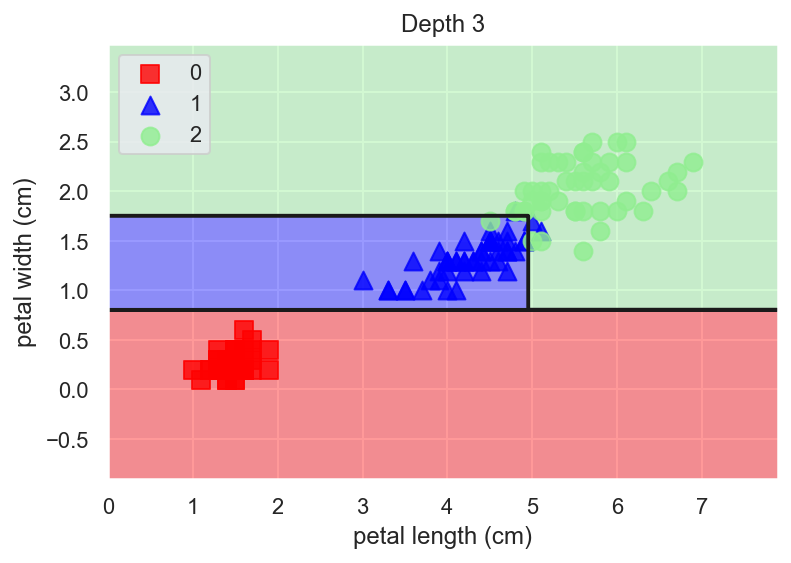

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [12]:
plot_decision_regions(X, y, tree3, 'Depth 3')
plt.show()
confusion_matrix(y, tree3.predict(X))

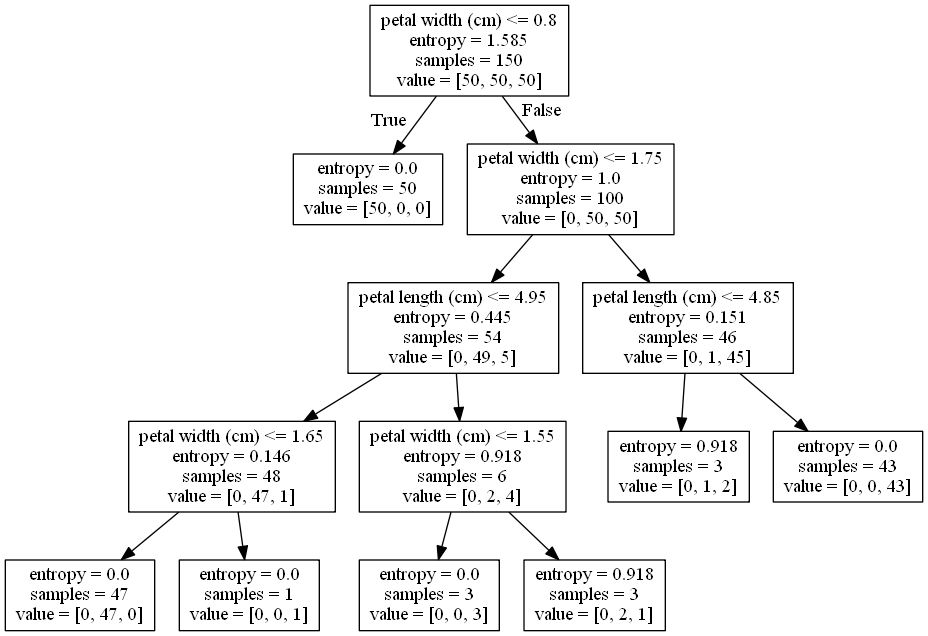

In [13]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X,y)
draw_decision_tree(tree4)

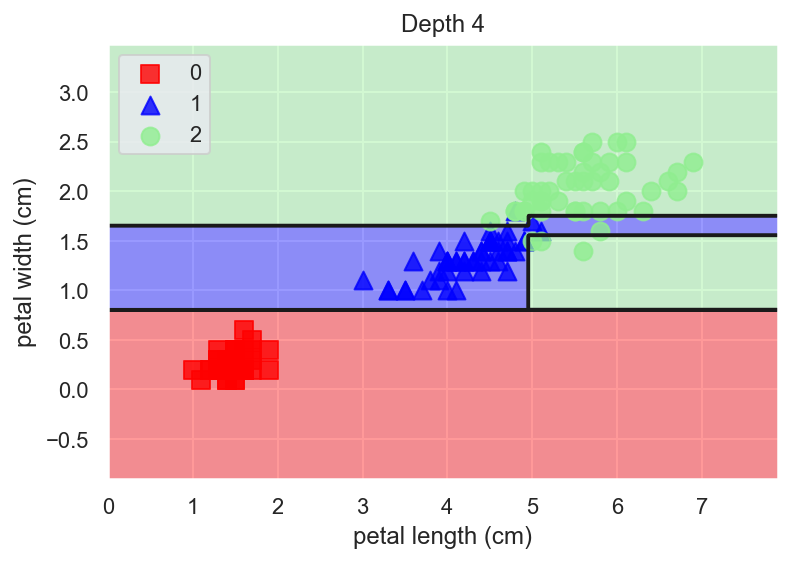

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [14]:
plot_decision_regions(X, y, tree4, 'Depth 4')
plt.show()
confusion_matrix(y, tree4.predict(X))

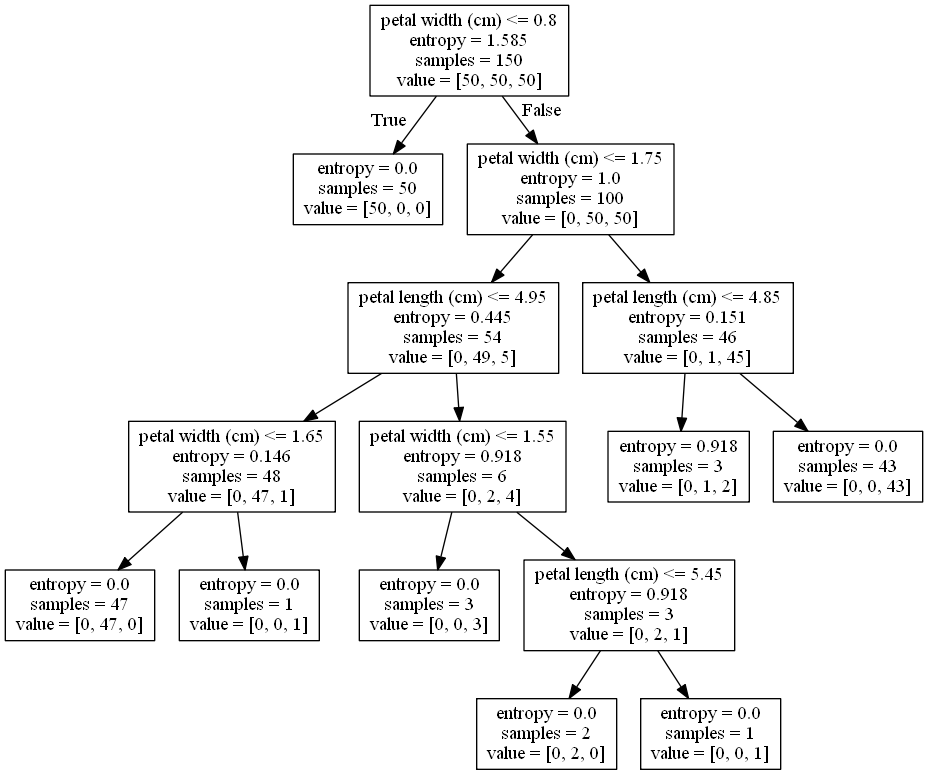

In [15]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X,y)
draw_decision_tree(tree5)

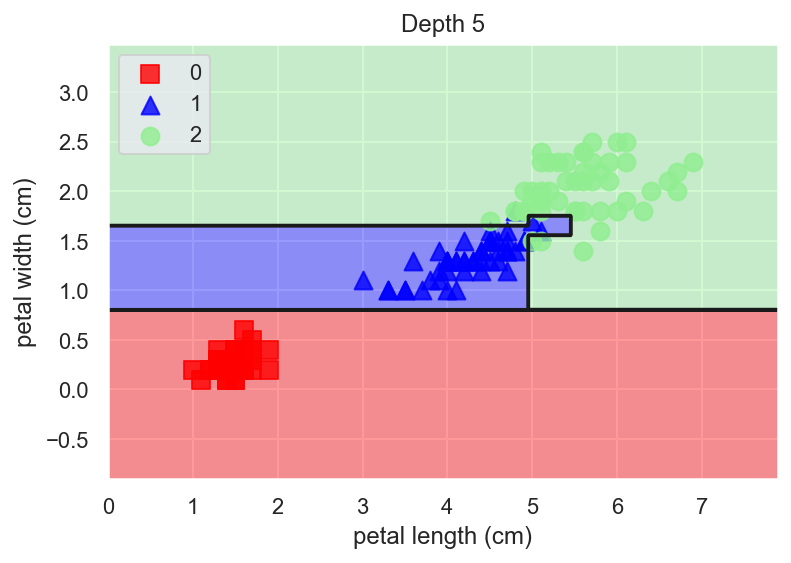

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [16]:
plot_decision_regions(X, y, tree5, 'Depth 5')
plt.show()
confusion_matrix(y, tree5.predict(X))

## 연습문제

In [17]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, :2]
y = data.target
feature_names = data.feature_names[:2]

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X,y)

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score

accuracy_score(y1, y1_pred)

0.8133333333333334

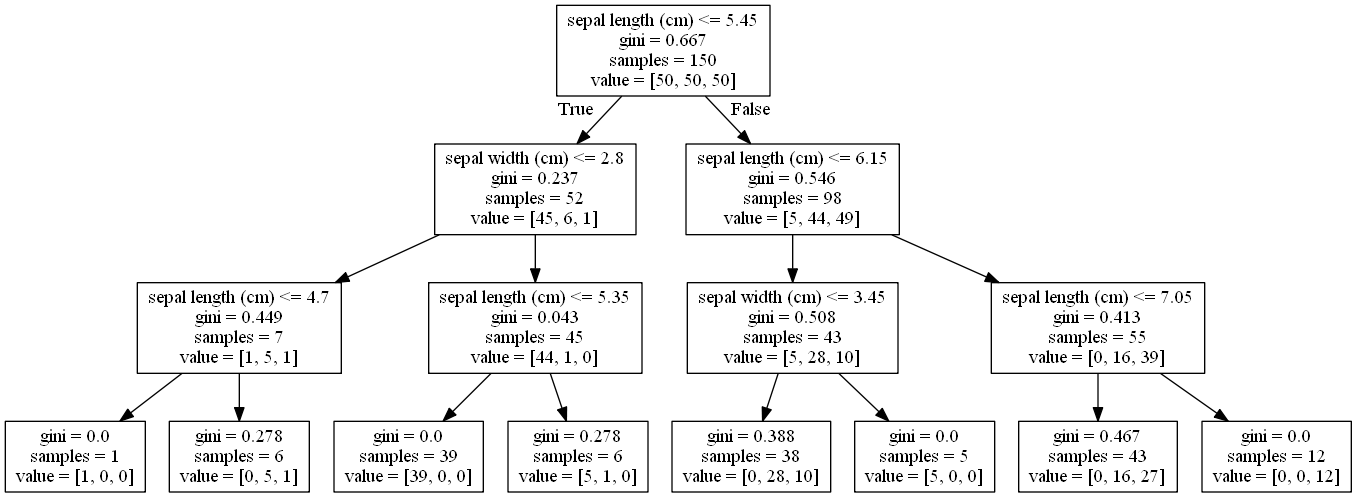

In [19]:
draw_decision_tree(model1)

[]

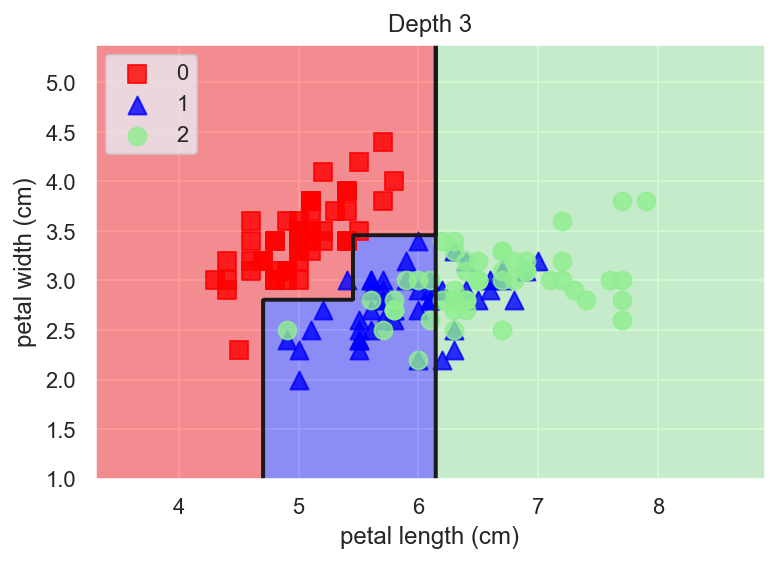

In [20]:
plot_decision_regions(X1, y1, model1, 'Depth 3')
plt.plot()

In [21]:
from sklearn.model_selection import cross_val_score, KFold

In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
cross_val_score(model1, X1, y1, scoring="accuracy", cv=cv).mean()

0.6933333333333334

In [37]:
# random_state=0 으로 했으므로, cv.split()에 X를 넣든 y를 넣든 인덱스는 모두 같게 나옴.
list(cv.split(X))[0]

(array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,
         15,  17,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,  31,
         32,  34,  35,  36,  38,  39,  41,  42,  43,  46,  47,  48,  49,
         50,  52,  53,  55,  56,  57,  58,  59,  60,  61,  64,  65,  67,
         68,  69,  70,  72,  74,  75,  77,  79,  80,  81,  82,  83,  84,
         85,  87,  88,  89,  91,  92,  94,  95,  96,  98,  99, 101, 102,
        103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117,
        118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
        133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([  7,   8,  16,  22,  24,  26,  33,  37,  40,  44,  45,  51,  54,
         62,  63,  66,  71,  73,  76,  78,  86,  90,  93,  97, 100, 107,
        114, 121, 126, 134]))

In [36]:
list(cv.split(y))[0]

(array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,
         15,  17,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,  31,
         32,  34,  35,  36,  38,  39,  41,  42,  43,  46,  47,  48,  49,
         50,  52,  53,  55,  56,  57,  58,  59,  60,  61,  64,  65,  67,
         68,  69,  70,  72,  74,  75,  77,  79,  80,  81,  82,  83,  84,
         85,  87,  88,  89,  91,  92,  94,  95,  96,  98,  99, 101, 102,
        103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117,
        118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
        133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([  7,   8,  16,  22,  24,  26,  33,  37,  40,  44,  45,  51,  54,
         62,  63,  66,  71,  73,  76,  78,  86,  90,  93,  97, 100, 107,
        114, 121, 126, 134]))

In [23]:
ls = []
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth = depth, criterion='entropy', random_state=0)
    ls.append(cross_val_score(model, X1, y1, scoring='accuracy', cv=cv).mean())

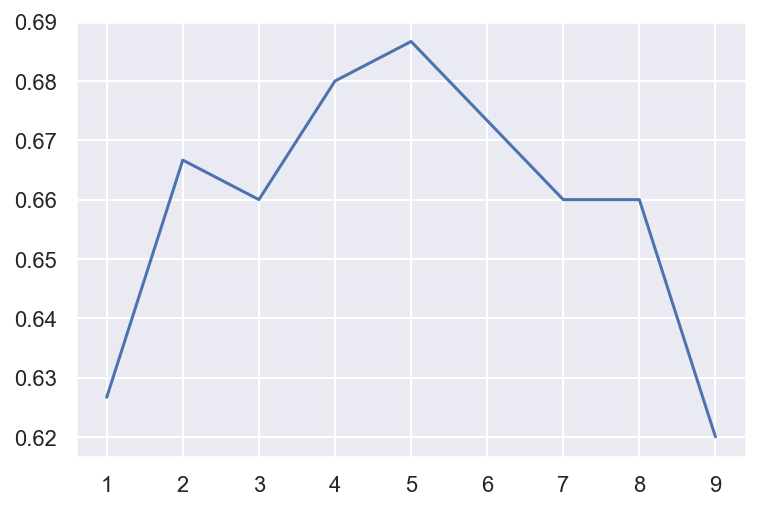

In [24]:
plt.plot([1,2,3,4,5,6,7,8,9], ls)

# 타이타닉호 생존자 예측

In [39]:
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
feature_names = ['pclass','age','sex']
dfX = df[feature_names].copy()
dfy = df['survived'].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [42]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True)

In [43]:
dfX.tail()

,pclass,age,sex
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male
890,3,32.000000,male


In [44]:
from sklearn.preprocessing import LabelEncoder
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])

In [45]:
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [47]:
dfX2 = pd.get_dummies(dfX['pclass'], prefix='pclass')
dfX.drop('pclass', axis=1, inplace=True)
dfX = pd.concat([dfX, dfX2], axis=1)
dfX.tail()

,age,sex,pclass_1,pclass_2,pclass_3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)
model = DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

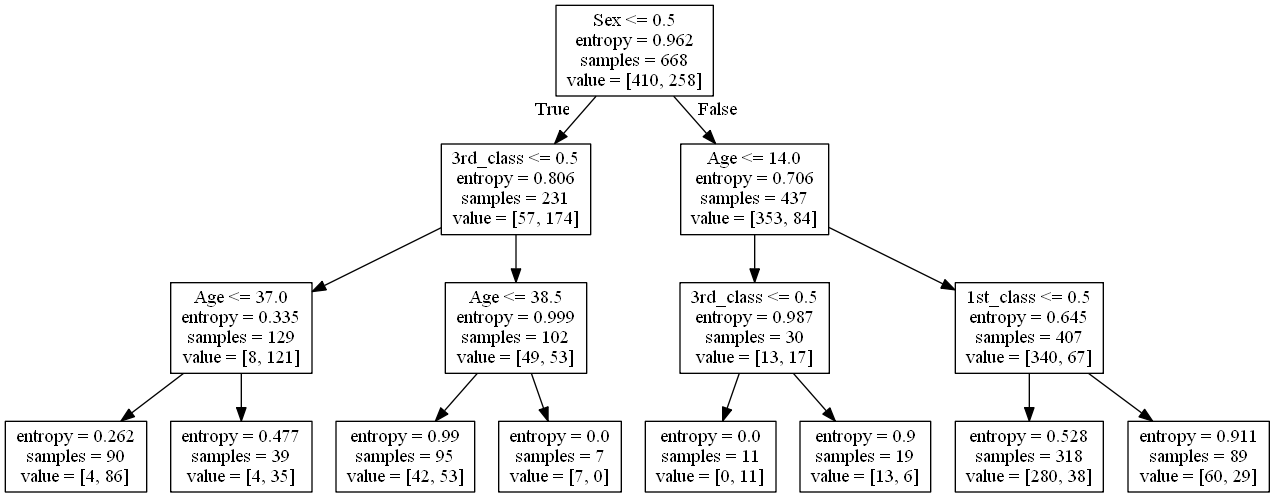

In [49]:
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [51]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]], dtype=int64)

In [52]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



# breast cancer 분류 예측

In [58]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, dtype='category')

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

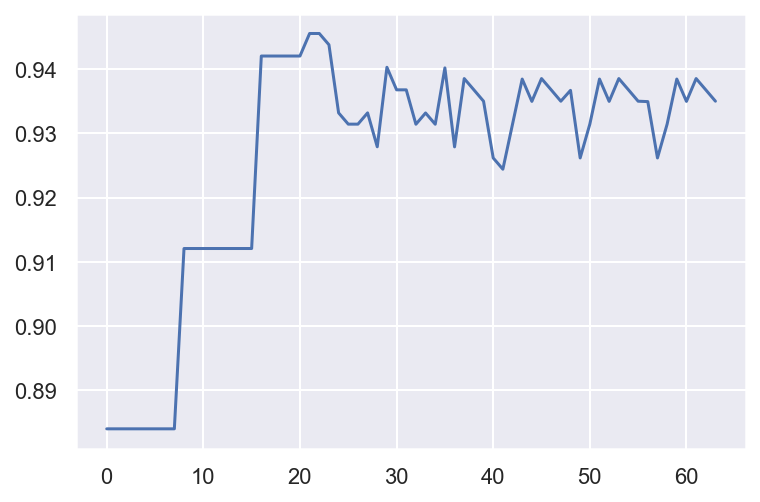

In [78]:
from itertools import product
ls = []
for i, tup in enumerate(product(range(1,9), range(1,9))):
        model = DecisionTreeClassifier(random_state=tup[0], max_depth=tup[1], min_samples_leaf=num, criterion='entropy').fit(X,y)
        ls.append(cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean())

plt.plot(ls)
plt.show()

In [97]:
list(product(range(1,9), range(1,9)))[np.argmax(ls)]

(3, 6)

In [98]:
model = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=6, criterion='entropy').fit(X, y)

In [99]:
y_pred = model.predict(X)

In [100]:
confusion_matrix(y, y_pred)

array([[196,  16],
       [  3, 354]], dtype=int64)

In [101]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       212
           1       0.96      0.99      0.97       357

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569



In [102]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean()

0.9455519329296692

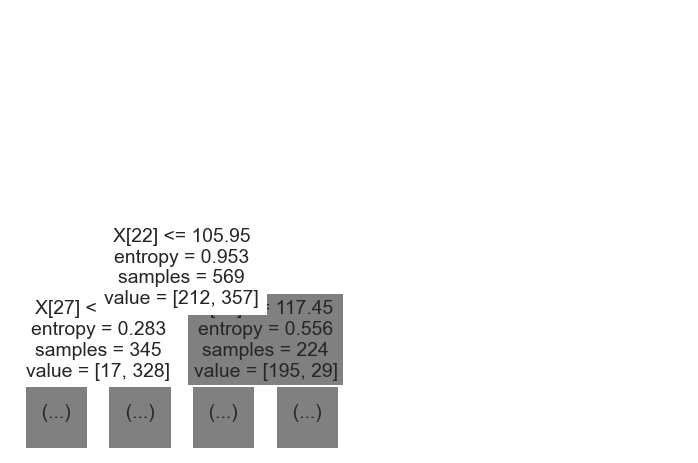

In [103]:
from sklearn.tree import plot_tree
plot_tree(model, max_depth=1)
plt.show()